# ICS 490 Special Topics in CS: <br />Twitter Sentiment Analysis
## Term Project - Part II

by:  <br /> 
Mustafa Al-Turki <br /> 
Abdullrazzaq Al-Shoshan <br /> 
Ali Al-Barrak <br /> 

# Dataset

Cinema in Saudi Arabia, a dataset collected using Twitter API and labelled manually by three labels, each indicating the sentiment of the labelled tweet regarding openning cinemas in Saudi Arabia. The labels are Postitive, Negative and Neutral.

## Tasks


1.	Build your own twitter dataset for sentiment analysis in Arabic language where labels should be: “Positive”, “Negative” and “Neutral”. <br/>
a.	Make sure to have at least 5000 tweets in your database<br/>
b.	Make sure to label all the collected tweets.<br/>

2.	Implement a classifier to classify your generated data. Make sure to use an ensemble classifier that will consist of:<br/>
a.	Support vector machines.<br/>
b.	Random forests.<br/>
c.	Multinomial Naïve Bayes.<br/>
d.	Softmax classifier<br/>

Import some important libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding("utf-8")
sys.stdout = stdout

## Data Preparation

Load the dataset as a Pandas dataframe and extract some columns as numpy arrays

In [4]:
dFrame = pd.read_csv('cinema_in_ksa.csv', dtype = {'Sentiment':str,'ID':str,'Text':str})
tweets = dFrame[['Text']].as_matrix().reshape((5323,))
sentiments = dFrame[['Sentiment']].as_matrix().reshape((5323,))

In [5]:
dFrame

,Sentiment,ID,Text
0,positive,9.4E+17,#السينما_في_السعوديه #المجتمع_متعطش_للسينما عس...
1,negative,9.4E+17,السينما ودخول الملاعب والحفلات الغنائيه كلها م...
2,positive,9.4E+17,الله يسعدك بابا سلمان #السينما_في_السعوديه
3,positive,9.4E+17,#السينما_في_السعوديه #المجتمع_متعطش_للسينما ال...
4,negative,9.4E+17,#السينما_في_السعوديه مواطنه سعوديه ولي حق أعطي...
5,negative,9.4E+17,السينما راح تزيد ارباح بالملايين لكن لم ننظر ...
6,negative,9.4E+17,#السينما_في_السعوديه اعتراضنا على السينما درء...
7,positive,9.4E+17,بإذن الله ثلاث شهور الا انت تشوف فيلم في صالة ...
8,positive,9.4E+17,اخيرااا 💜😭 #السينما_في_السعوديه
9,positive,9.4E+17,كثير من الناس راح يستفيدون من صالات السينما مث...


Count the number of tweets for each class and the corresponding percentage.

In [6]:
print "Number of tweets per class: \n"
print dFrame['Sentiment'].value_counts()
total = dFrame['Sentiment'].value_counts().sum()
positive = dFrame['Sentiment'].value_counts()[0] 
neutral = dFrame['Sentiment'].value_counts()[1]
negative = dFrame['Sentiment'].value_counts()[2]
print "The percentage of postive tweets: " + str("%.2f" % (positive *100.0 / total))
print "The percentage of negative tweets: " + str("%.2f" % (negative *100.0 / total))
print "The percentage of neutral tweets: " + str("%.2f" % (neutral *100.0 / total))

Number of tweets per class: 

positive    2578
neutral     1498
negative    1247
Name: Sentiment, dtype: int64
The percentage of postive tweets: 48.43
The percentage of negative tweets: 23.43
The percentage of neutral tweets: 28.14


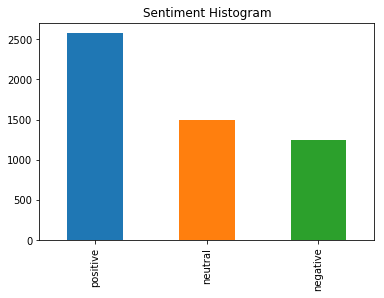

In [7]:
dFrame['Sentiment'].value_counts().plot(kind='bar',title='Sentiment Histogram')

Remove punctuations

In [8]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 

dFrame['Text'] = dFrame['Text'].apply(remove_punctuation)

Apply Stemming to all tweets

In [9]:
from nltk.stem import isri
stemmer = isri.ISRIStemmer()

for i in range(len(tweets)):
    ne = map (stemmer.stem, [t.decode('utf-8') for t in tweets[i].split() ])
    w = ''
    for n in ne:
        w = w + " "+str(n)
    w = w.strip()
    tweets[i] = w

Importing Arabic stop words from nltk.corpus

In [10]:
from nltk.corpus import stopwords
stopword = stopwords.words('arabic')


## Feature Extraction

## Term Frequency - Inverse Document Frequency (TF-IDF)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = stopword)
X = count_vect.fit_transform(dFrame['Text'])

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.shape

(5323, 16385)

## Fixing Data Imbalance

To achieve this goal we will generate synthtic data for the positive and negative class. we will use imbalanced-learn package provided under scikit-learn-contrib project.

Note: to install the package on Python, run the following command: <br\>
```
    pip install -U imbalanced-learn
```

In [12]:
from imblearn.over_sampling import SMOTE
re_X_tfidf, re_sentiments = SMOTE().fit_sample(X_tfidf, sentiments)

In [13]:
positive, negative, irrelevant, neutral = 0,0,0,0
for sent in re_sentiments:
    if sent == 'positive':
        positive += 1
    elif sent == 'negative':
        negative +=1
    elif sent == 'neutral':
        neutral +=1

total = positive + negative + irrelevant + neutral
print "Tweets in positive class: " + str(positive)
print "Tweets in negative class: " + str(negative)
print "Tweets in neutral class: " + str(neutral)

print "The percentage of postive tweets: " + str("%.2f" % (positive *100.0 / total))
print "The percentage of negative tweets: " + str("%.2f" % (positive *100.0 / total))
print "The percentage of neutral tweets: " + str("%.2f" % (positive *100.0 / total))

Tweets in positive class: 2578
Tweets in negative class: 2578
Tweets in neutral class: 2578
The percentage of postive tweets: 33.33
The percentage of negative tweets: 33.33
The percentage of neutral tweets: 33.33


## Classification Task

### Classifier #1 Softmax

#### 1.1 The performance of Softmax on the imbalance data.

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, sentiments, stratify = sentiments)
softmax = linear_model.LogisticRegression(penalty ='l2', tol=1e-7, C=1000, solver = 'newton-cg', multi_class = 'multinomial',max_iter=700)
softmax.fit(X_train, y_train)
print "%.4f" % (softmax.score(X_test, y_test))

0.6401


#### 1.2 The performance of Softmax using the dataset plus the synthized data.

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(re_X_tfidf, re_sentiments, stratify = re_sentiments)
softmax = linear_model.LogisticRegression(penalty ='l2', tol=1e-7, C=1000, solver = 'lbfgs', multi_class = 'multinomial',max_iter=700)
softmax.fit(X_train, y_train)
print "%.4f" % (softmax.score(X_test, y_test))

0.8361


#### 1.3 Applying Dimensionality Reduction.  <br/>
Note: Since the tf-idf matrix is sparce, PCA with svd_solver cannot be used, insted we use Latent Semantic Analysis (LSA) which is also known as Truncated SVD.

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components = 2500, algorithm='randomized')
X_lsa = lsa.fit_transform(re_X_tfidf)
print X_lsa.shape
print "%.4f" % (np.sum(lsa.explained_variance_ratio_))

(7734L, 2500L)
0.8084


#### 1.4 Performing Grid Search

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

param_grid = [
  
  {'penalty' :['l2'],'tol': [1e-10, 1e-9,1e-8,1e-7,1e-6,1e-6,1e-5,1e-4,1e-3],
   'C': [1e+01, 1e+02, 1e+03], 
   'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],'max_iter': [400,500,600],
   'multi_class': ['ovr', 'multinomial']}
 ]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
grid = GridSearchCV(linear_model.LogisticRegression(n_jobs=-1), param_grid=param_grid, cv=cv,verbose = 50,n_jobs=-1)
grid.fit(X_lsa, re_sentiments)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  5.0min
[Paral

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed: 18.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed: 29.9min
[Paralle

#### 1.5 The performance of Softmax using the dataset plus the synthized data after applying dimensionality reduction .

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lsa, re_sentiments, stratify = re_sentiments)
softmax = linear_model.LogisticRegression(penalty ='l2', tol=1e-7, C=1000, solver = 'lbfgs', multi_class = 'multinomial',max_iter=700)
softmax.fit(X_train, y_train)
print "%.4f" % (softmax.score(X_test, y_test))

0.7870


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lsa, re_sentiments, stratify = re_sentiments)
softmax = linear_model.LogisticRegression(penalty ='l1', tol=1e-7, C=1000, solver = 'saga', multi_class = 'multinomial',max_iter=700)
softmax.fit(X_train, y_train)
print "%.4f" % (softmax.score(X_test, y_test))

#### 1.6 Calculating the average performance over 100 runs

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

softmax = linear_model.LogisticRegression(penalty ='l2', tol=1e-7, C=1000, solver = 'newton-cg', multi_class = 'multinomial',max_iter=700)
total_score = 0

for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X_lsa, re_sentiments, stratify = re_sentiments)
    softmax.fit(X_train, y_train)
    if i %10 == 0:
        print 'run '+ str (i)
    
    total_score += softmax.score(X_test, y_test)
    
print 'Average Absolute accuracy ' + str(total_score*1.0/10)

Average Absolute accuracy 0.704653567735


### Classifier #2 Support Vector Machine (SVM)

#### 2.1 The performance of SVM on the imbalance data.

In [18]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, sentiments, stratify = sentiments)
svmClf = svm.SVC(tol=1e-7,C=1000,kernel='rbf',gamma = 1.0)
svmClf.fit(X_train, y_train)
svmClf.score(X_test, y_test)

0.65289256198347112

#### 2.2 The performance of SVM using the dataset plus the synthized data.

In [19]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(re_X_tfidf, re_sentiments, stratify = re_sentiments)
svmClf = svm.SVC(tol=1e-7,C=1000,kernel='rbf',gamma = 1.0)
svmClf.fit(X_train, y_train)
svmClf.score(X_test, y_test)

0.78076525336091007

#### 2.3 Applying  Dimensionality Reduction.  <br/>
Note: Since the tf-idf matrix is sparce, PCA with svd_solver cannot be used, insted we use Latent Semantic Analysis (LSA) which is also known as Truncated SVD.

In [62]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components = 3300, algorithm='randomized')
X_lsa = lsa.fit_transform(re_X_tfidf)
print X_lsa.shape

(7437L, 3300L)


#### 2.4 Performing Grid Search

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
  {'C': [1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
         1.00000000e+01,   1.00000000e+02,   1.00000000e+03], 
   'gamma': [ 1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03], 'kernel': ['rbf']}]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv,verbose = 9,n_jobs=-1)
grid.fit(X_lsa, re_sentiments)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

#### 2.5  The performance of SVM using the dataset plus the synthized data after applying  dimensionality reduction.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lsa, re_sentiments, stratify = re_sentiments)
svmClf = svm.SVC(tol=1e-7,C=1000,kernel='rbf')
svmClf.fit(X_train, y_train)
svmClf.score(X_test, y_test)

0.79679420889348496

#### 2.6 Calculating the average performance over 100 runs

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

svmClf = svm.SVC(tol=1e-7,C=1000,kernel='rbf',gamma = 1.0)
total_score = 0

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_lsa, re_sentiments, stratify = re_sentiments)
    svmClf.fit(X_train, y_train)
    if i %10 == 0:
        print 'run '+ str (i)
    
    total_score += svmClf.score(X_test, y_test)
    
print 'Average Absolute accuracy ' + str(total_score*1.0/100)

### Classifier #3 Multinomial Naïve Bayes

#### 3.1 The performance of Multinomial Naïve Bayes on the imbalance data.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, sentiments, stratify = sentiments)
mnbClf = MultinomialNB(1e-50)
mnbClf.fit(X_train, y_train)
mnbClf.score(X_test, y_test)

#### 3.2 The performance of Multinomial Naïve Bayes using the dataset plus the synthized data.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(re_X_tfidf, re_sentiments, stratify = re_sentiments)
mnbClf = MultinomialNB(1e-80)
mnbClf.fit(X_train, y_train)
mnbClf.score(X_test, y_test)

#### 3.3 Applying  Dimensionality Reduction.  <br/>
Note: Since Naïve Bayes does not allow negative feature, Non-negative Matrix Factorization (NMf) is used in dimensionality reduction.

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=1550, init='random', random_state=0)
X_nmf = nmf.fit_transform(re_X_tfidf)


#### 3.4 Performing Grid Search.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

param_grid = [
  {'alpha': [1e-1000,   1e-100,   1e-50, 1e-25,   1e-16,   1e-7]}]

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
grid = GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=cv,verbose = 9,n_jobs=-1)
grid.fit(X_nmf, re_sentiments)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

#### 3.5 The performance of SVM using the dataset plus the synthized data after applying dimensionality reduction. 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_nmf, re_sentiments, stratify = re_sentiments)
mnbClf = MultinomialNB(alpha = 1e-16)
mnbClf.fit(X_train, y_train)
mnbClf.score(X_test, y_test)

#### 3.6 Calculating the average performance over 100 runs

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

mnbClf = MultinomialNB(alpha = 1e-16)
total_score = 0

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_nmf, re_sentiments, stratify = re_sentiments)
    mnbClf.fit(X_train, y_train)
    if i %10 == 0:
        print 'run '+ str (i)
    
    total_score += mnbClf.score(X_test, y_test)
    
print 'Average Absolute accuracy ' + str(total_score*1.0/100)

### Classifier #4 Random Forest

#### 4.1 The performance of Random Forest on the imbalance data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, sentiments, stratify = sentiments)
rfClf = RandomForestClassifier(n_estimators=100,max_depth=300,  n_jobs=-1)
rfClf.fit(X_train, y_train)
rfClf.score(X_test, y_test)

#### 4.2 The performance of Random Forest using the dataset plus the synthized data.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(re_X_tfidf, re_sentiments, stratify = re_sentiments)
rfClf = RandomForestClassifier(n_estimators=100,max_depth=300, n_jobs=-1)
rfClf.fit(X_train, y_train)
rfClf.score(X_test, y_test)

0.70860215053763442

#### 4.3 Applying  Dimensionality Reduction.  <br/>
Note: Since the tf-idf matrix is sparce, PCA with svd_solver cannot be used, insted we use Latent Semantic Analysis (LSA) which is also known as Truncated SVD.

In [ ]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components = 3300, algorithm='randomized')
X_lsa = lsa.fit_transform(re_X_tfidf)
print X_lsa.shape

#### 4.4 Performing Grid Search.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
  {'n_estimators ' : [ 10, 100,200,300,400,500,600,700,800,900,100],
   'max_depth': [1e+01, 1e+02, 1e+03], 
   }]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv,verbose = 9,n_jobs=-1)
grid.fit(X_lsa, re_sentiments)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

#### 4.5 The performance of Random Forest using the dataset plus the synthized data after applying dimensionality reduction. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lsa, re_sentiments, stratify = re_sentiments)
rfClf = RandomForestClassifier(n_estimators=100,max_depth=300, n_jobs=-1)
rfClf.fit(X_train, y_train)
rfClf.score(X_test, y_test)

#### 4.6 Calculating the average performance over 100 runs

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rfClf = RandomForestClassifier(n_estimators=100,max_depth=300, n_jobs=-1)
total_score = 0

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_lsa, re_sentiments, stratify = re_sentiments)
    rfClf.fit(X_train, y_train)
    if i %10 == 0:
        print 'run '+ str (i)
    
    total_score += rfClf.score(X_test, y_test)
    
print 'Average Absolute accuracy ' + str(total_score*1.0/100)

### 5 Ensemble of all Previous Classifiers

#### 5.1 The performance of the ensemble on the imbalance data.

In [ ]:
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, sentiments, stratify = sentiments)


clf1 = linear_model.LogisticRegression(penalty ='l2', tol=1e-7, C=1, solver = 'newton-cg', multi_class = 'multinomial',max_iter=500)
clf2 = svm.SVC(tol=1e-7,C=1000,kernel='rbf',gamma = 1.0, probability=True)
clf3 = MultinomialNB(alpha = 1e-16)
clf4 = RandomForestClassifier(n_estimators=100,max_depth=300, n_jobs=-1)
eclf = VotingClassifier(estimators=[
        ('clf1', clf1), ('clf2', clf2), ('clf3', clf3),(('clf4', clf4))],
        voting='soft')

eclf.fit(X_train, y_train)

eclf.score(X_test, y_test)

#### 5.2 The performance of the ensemble using the dataset plus the synthized data.

In [62]:
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(re_X_tfidf, re_sentiments, stratify = re_sentiments)


clf1 = linear_model.LogisticRegression(penalty ='l2', tol=1e-7, C=1, solver = 'newton-cg', multi_class = 'multinomial',max_iter=500)
clf2 = svm.SVC(tol=1e-7,C=1000,kernel='rbf',gamma = 1.0, probability=True)
clf3 = MultinomialNB(alpha = 1e-16)
clf4 = RandomForestClassifier(n_estimators=100,max_depth=300, n_jobs=-1)
eclf = VotingClassifier(estimators=[
        ('clf1', clf1), ('clf2', clf2), ('clf3', clf3),(('clf4', clf4))],
        voting='soft')

eclf.fit(X_train, y_train)

eclf.score(X_test, y_test)

0.81989247311827962

#### 5.3 Applying  Dimensionality Reduction.  <br/>
Note: Since Naïve Bayes does not allow negative feature, Non-negative Matrix Factorization (NMf) is used in dimensionality reduction.

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=1550, init='random', random_state=0)
X_nmf = nmf.fit_transform(re_X_tfidf)

#### 5.4 The performance of the ensemble using the dataset plus the synthized data after applying dimensionality reduction. 

In [ ]:
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X_nmf, re_sentiments, stratify = re_sentiments)


clf1 = linear_model.LogisticRegression(penalty ='l2', tol=1e-7, C=1, solver = 'newton-cg', multi_class = 'multinomial',max_iter=500)
clf2 = svm.SVC(tol=1e-7,C=1000,kernel='rbf',gamma = 1.0, probability=True)
clf3 = MultinomialNB(alpha = 1e-16)
clf4 = RandomForestClassifier(n_estimators=100,max_depth=300,  n_jobs=-1)
eclf = VotingClassifier(estimators=[
        ('clf1', clf1), ('clf2', clf2), ('clf3', clf3),(('clf4', clf4))],
        voting='soft')

eclf.fit(X_train, y_train)

eclf.score(X_test, y_test)

#### 5.5 Calculating the average performance over 100 runs

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

total_score = 0

clf1 = linear_model.LogisticRegression(penalty ='l2', tol=1e-7, C=1, solver = 'newton-cg', multi_class = 'multinomial',max_iter=500)
clf2 = svm.SVC(tol=1e-7,C=1000,kernel='rbf',gamma = 1.0, probability=True)
clf3 = MultinomialNB(alpha = 1e-16)
clf4 = RandomForestClassifier(n_estimators=100,max_depth=300, n_jobs=-1)
eclf = VotingClassifier(estimators=[
        ('clf1', clf1), ('clf2', clf2), ('clf3', clf3),(('clf4', clf4))],
        voting='soft')

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_nmf, re_sentiments, stratify = re_sentiments)
    eclf.fit(X_train, y_train)
    if i %10 == 0:
        print 'run '+ str (i)
    
    total_score += eclf.score(X_test, y_test)
    
print 'Average Absolute accuracy ' + str(total_score*1.0/100)